# Imbalanced Classes

While the use of precision and recall and / or ROC curves can help evaluate situations where classes are imbalanced, they do not help with training.  In these cases, it is sometimes useful to _resample_ your data, to achieve something closer to parity.  As a rule of thumb, if your minority class makes up less than 20% of the data, consider resampling. 

### Common Techniques

Although there are a variety of way you might approach re-sampling (including building your own custom strategy), there are three common methods that can be readily applied:

- **Random Over Sampling (ROS)** : Randomly duplicate examples in the minority class

- **Random Under Sampling (RUS)** : Randomly remove examples in the majority class

- **Synthetic Minority Over-sampling Technique (SMOTE):** Generate new examples in the minority class by interpolating between existing examples (see below).

Note that all of these methods can introduce bias or noise, and that it is important perform resampling techniques within the folds of cross-validation to avoid leakage (otherwise, you can "cheat" and artificially boost performance metrics). As with all ML techniques,
domain knowledge is crucial in choosing the right resampling method.

### SMOTE

* Approach
  * Randomly pick a point from the minority class.
  * Calculate the k-nearest neighbors (for some pre-specified _k_) for this point.
  * Choose one of the k-nearest neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
* Benefits
  * Alleviates Overfitting
  * Class Separability:
  * Improved Accuracy
* Limitations
  * Introduces noise
  * Computational complexity
  * Over-generalization
  * High-dimensional data
  * Distorting data distribution

SMOTE has a variety of benefits when compared to ROS or RUS:

- **Alleviates Overfitting:** Unlike random oversampling, SMOTE generates synthetic examples, reducing the risk of overfitting that comes with duplicating minority class examples.
- **Class Separability:** It can enhance the decision boundary by filling in the gaps between minority examples, making it easier for classifiers to differentiate between classes.
- **Improved Accuracy:** Often results in better classifier performance when compared to random undersampling or oversampling.

Of course, there are also drawbacks:

- **Introduces Noise:** The synthetic examples created can be noisy and may not always correspond to valid examples, especially when the feature space is not continuous.
- **Computational Complexity:** SMOTE is computationally expensive as it requires the calculation of k-nearest neighbors.
- **Risk of Over-generalization:** It can cause the classifier to over-generalize on the minority class, making it too sensitive and leading to higher false positives for the majority class.
- **Not Ideal for High-Dimensional Data:** SMOTE might not be effective for high-dimensional data as the concept of "neighbor" becomes less distinct in higher dimensions.
- **May Distort Data Distribution:** It can change the underlying distribution of the minority class and introduce a bias.
- **Not Suitable for All Datasets:** For some imbalanced datasets, using SMOTE may not lead to a significant improvement in performance.

### Code

The `IMBLearn` library provides several tools for handling imbalanced classes.  You can install it like this:

In [1]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 6.2 MB/s eta 0:00:00:00:01


The following code illustrates how to use IMBLearn.

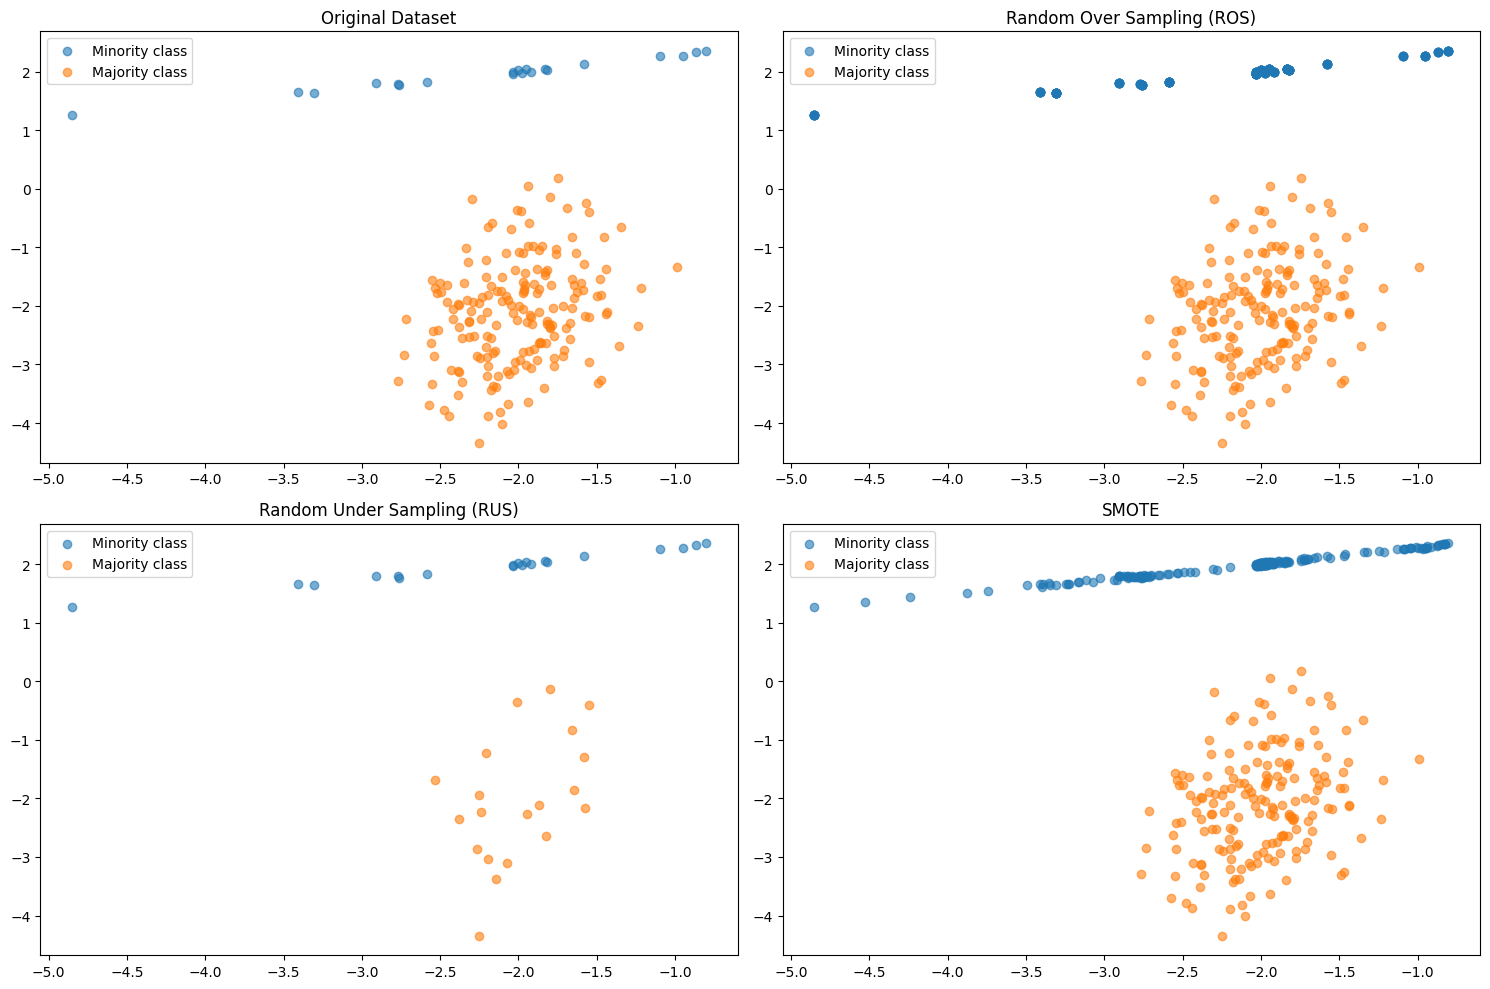

In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Create a 2D imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Apply Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

# Apply Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Scatter plot code to visualize before and after effects of each technique
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Minority class', alpha=0.6)
axes[0,0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Majority class', alpha=0.6)
axes[0,0].set_title('Original Dataset')
axes[0,0].legend()

axes[0,1].scatter(X_resampled_ros[y_resampled_ros == 0][:, 0], X_resampled_ros[y_resampled_ros == 0][:, 1], label='Minority class', alpha=0.6)
axes[0,1].scatter(X_resampled_ros[y_resampled_ros == 1][:, 0], X_resampled_ros[y_resampled_ros == 1][:, 1], label='Majority class', alpha=0.6)
axes[0,1].set_title('Random Over Sampling (ROS)')
axes[0,1].legend()

axes[1,0].scatter(X_resampled_rus[y_resampled_rus == 0][:, 0], X_resampled_rus[y_resampled_rus == 0][:, 1], label='Minority class', alpha=0.6)
axes[1,0].scatter(X_resampled_rus[y_resampled_rus == 1][:, 0], X_resampled_rus[y_resampled_rus == 1][:, 1], label='Majority class', alpha=0.6)
axes[1,0].set_title('Random Under Sampling (RUS)')
axes[1,0].legend()

axes[1,1].scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], label='Minority class', alpha=0.6)
axes[1,1].scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], label='Majority class', alpha=0.6)
axes[1,1].set_title('SMOTE')
axes[1,1].legend()

plt.tight_layout()
plt.show()



### General guidelines for Resampling

* Resampling by over-sampling can yield “brittle” classifiers that do not generalize the minority class.
* Do not resample with test data included!  This can lead to data leakage.
* Whether or not to report results on resampled data depends on your goals:
  * YES: when comparing different classifiers, or different resampling methods, or consider new algorithms
  * NO: when trying to show generalization, or in safety critical scenarios
  * Oftentimes, a good strategy is to report both!
